In [109]:
import pandas as pd
import plotly.express as px

In [110]:
df = pd.read_csv('cleaned_data/joined_data.csv')

In [111]:
df.head()

,sample_id,date_of_sampling,description,country_of_origin,sampling_point,address,brand_name,packer / manufacturer / importer,amount_detected,chem_name,MRL
0,3729/2021,2021-05-25T00:00:00,Green Asparagus,UK,Aberdeen & Stanton Ltd,"67 New Spitalfields Market, Sherrin Road, Leyt...",Watts Farms,"Watts Farm Farningham Hill Road, Farningham, K...",NaN,NaN,NaN
1,3697/2021,2021-05-25T00:00:00,Asparagus,UK,Addey & Son (Western International) Ltd,"P35 Western International Market, Hayes Road, ...",Spanton Farms,"Edward Spanton Farms Wayborough Farm, Minster,...",NaN,NaN,NaN
2,3715/2021,2021-05-11T00:00:00,Asparagus,UK,Aldi,"Thomsett Way, Queenborough, Kent ME11 5AR",Aldi,,NaN,NaN,NaN
3,5503/2021,2021-11-15T00:00:00,Asparagus Tips,Peru,Aldi,"Marton Road, Middlesbrough TS4 2PQ",Nature's Pick,"Aldi Stores Ltd PO Box 26. Atherstone, Warwick...",NaN,NaN,NaN
4,0565/2021,2021-10-18T00:00:00,Asparagus,Peru,Asda,"Western Way, Bury St Edmunds IP33 3SP",ASDA Grower Selection,"ASDA Stores Ltd Great Wilson Street, Leeds LS1...",NaN,NaN,NaN


- samples per month
- number of unique descriptions, country of origin, sampling points, brand name, packer
- samples per country
- do I need address?
- mean compared to median for amount detected, MRL
- mean amount detected by country

In [112]:
df.isna().sum()

sample_id                              0
date_of_sampling                       0
description                            0
country_of_origin                      0
sampling_point                         0
address                                0
brand_name                             0
packer / manufacturer / importer       0
amount_detected                     9663
chem_name                           9578
MRL                                 9660
dtype: int64

### Samples per Month

In [113]:
df['month_year'] = pd.to_datetime(df['date_of_sampling']).dt.to_period('M')

In [114]:
samples_per_month = df.groupby('month_year').count()['sample_id'].reset_index()
samples_per_month['month_year'] = samples_per_month['month_year'].astype(str)

In [115]:
fig = px.line(samples_per_month,
              x='month_year',
              y='sample_id',
              title='Number of samples across the time period')
fig.update_layout(
    yaxis_title="Count of Samples",
    xaxis_title="Date",
)

fig.show()

### number of unique descriptions, country of origin, sampling points, brand name, packer


In [116]:
df.head(1)

,sample_id,date_of_sampling,description,country_of_origin,sampling_point,address,brand_name,packer / manufacturer / importer,amount_detected,chem_name,MRL,month_year
0,3729/2021,2021-05-25T00:00:00,Green Asparagus,UK,Aberdeen & Stanton Ltd,"67 New Spitalfields Market, Sherrin Road, Leyt...",Watts Farms,"Watts Farm Farningham Hill Road, Farningham, K...",NaN,NaN,NaN,2021-05


In [117]:
unique_cols = [x for x in df.columns[2:8] if x != 'address']

for col in unique_cols:
    print(f"unique values in {col}:", len(df[col].unique()))
    print("-" * 45)
    print(f"top 5 occuring values in {col}:\n", df[col].value_counts()[0:5])
    print(" " * 45)

unique values in description: 5991
---------------------------------------------
top 5 occuring values in description:
 Conference Pears        587
Whole Milk              463
Okra                    447
Star Ruby Grapefruit    425
Raspberries             331
Name: description, dtype: int64
                                             
unique values in country_of_origin: 150
---------------------------------------------
top 5 occuring values in country_of_origin:
 UK              10547
Spain            4117
South Africa     2327
England (UK)     1374
Italy             965
Name: country_of_origin, dtype: int64
                                             
unique values in sampling_point: 1496
---------------------------------------------
top 5 occuring values in sampling_point:
 Tesco          4847
Asda           3099
Sainsburys     2869
Morrisons      2416
Tesco Extra    1466
Name: sampling_point, dtype: int64
                                             
unique values in brand_name: 1

In [118]:
df[col].value_counts()[0:5]

Tesco Stores Ltd Welwyn Garden City AL7 1GA                                          2088
Tesco Stores Ltd Tesco House, Shire Park, Kestrel Way, Welwyn Garden City AL7 1GA    2036
Asda Stores Ltd Great Wilson Street, Leeds LS11 5AD                                  1457
                                                                                     1270
Sainsburys Supermarkets Ltd 33 Holborn, London EC1N 2HT                              1263
Name: packer / manufacturer / importer, dtype: int64

### samples per country

In [119]:
a = df['country_of_origin'].value_counts()[0:30].reset_index().rename({'index': 'country',
                                                                   'country_of_origin': 'samples'}, axis=1)

In [120]:
fig = px.bar(a,
              x='country',
              y='samples',
              title='Top 30 countries for number of samples')
fig.update_layout(
    yaxis_title="Count of Samples",
    xaxis_title="Country",
)

fig.show()

### mean compared to median for amount detected, MRL

In [121]:
df.amount_detected.mean()

0.4507567175273111

In [122]:
df.amount_detected.median()

0.05

In [123]:
fig = px.histogram(df.loc[df['amount_detected'] < 5, 'amount_detected'], title='distribution of amount detected (under 5)')
fig.add_vline(x=df['amount_detected'].mean(), line_width=3, line_dash="dash", line_color="green",
             annotation_text="mean price")
fig.add_vline(x=df['amount_detected'].median(), line_width=3, line_dash="dash", line_color="red",
             annotation_text="median price",annotation_position="top left")
fig.show()

### mean amount by country

In [124]:
df.groupby('country_of_origin').mean()['amount_detected'].sort_values(ascending=False)[0:20]

country_of_origin
Bolivia                   16.888750
the Netherlands            2.025000
Italy                      1.905556
Pakistan                   1.821167
St Lucia                   1.500000
Northern Ireland (UK)      1.277500
China                      1.208279
Australia                  1.080417
UK                         1.038629
Israel                     0.993583
France                     0.986071
Cyprus                     0.833392
Tanzania                   0.800000
Mozambique                 0.775000
Guyana                     0.740000
Argentina                  0.724615
Ukraine                    0.711515
UK                         0.692207
Chile                      0.675000
Peru                       0.585000
Name: amount_detected, dtype: float64

### over the mrl

In [125]:
df.loc[df['amount_detected'] > df['MRL'], 'compliant'] = 'N'

In [126]:
df = df.fillna({'compliant':'Y'})

In [127]:
df['compliant'].value_counts()

Y    31481
N     1055
Name: compliant, dtype: int64

In [128]:
df['sampling_point'].value_counts()

Tesco                   4847
Asda                    3099
Sainsburys              2869
Morrisons               2416
Tesco Extra             1466
                        ... 
Peter Treble               1
Oliver & Eden              1
McAtamney Butchers         1
M & G Butchers             1
A & J Bennett & Sons       1
Name: sampling_point, Length: 1496, dtype: int64

In [129]:
for col in unique_cols:
    print(f"top occuring non-compliant {col}:")
    print(df.loc[df['compliant'] == 'N', col].value_counts()[0:10])
    print("-" *45)
    print(" " *45)

top occuring non-compliant description:
Okra                        81
Vine Leaves in Brine        41
Guar Beans                  38
Yard Long Beans             29
Hyacinth Beans              25
Basmati Rice                19
Dried Curry Leaves          13
Ginger                      11
Topop Dried Curry Leaves    11
Rusks                       11
Name: description, dtype: int64
---------------------------------------------
                                             
top occuring non-compliant country_of_origin:
UK          393
India       161
Egypt        42
Malaysia     39
Spain        33
Kenya        29
Italy        24
China        24
Jordan       18
Honduras     17
Name: country_of_origin, dtype: int64
---------------------------------------------
                                             
top occuring non-compliant sampling_point:
Asda                        102
Tesco                       102
Sainsburys                   86
Tesco Extra                  64
Morrisons          

In [130]:
n_samples_per_month = df.loc[df['compliant'] == 'N'].groupby('month_year').count()['sample_id'].reset_index()
n_samples_per_month['month_year'] = samples_per_month['month_year'].astype(str)

In [138]:
n_samples_per_month.head(1)

,month_year,sample_id
0,2016-01,1


In [140]:
samples_per_month.head(1)

,month_year,sample_id
0,2016-01,154


In [146]:
r = {'sample_id': 'count'}
n_samples_per_month.rename(r, axis=1, inplace=True)
samples_per_month.rename(r, axis=1, inplace=True)

In [148]:
n_samples_per_month = n_samples_per_month.merge(samples_per_month, how='left', on='month_year', suffixes=['_non_compliant', '_compliant'])

In [149]:
n_samples_per_month.head(1)

,month_year,count_non_compliant,count_compliant
0,2016-01,1,154


In [150]:
fig = px.line(n_samples_per_month,
              x='month_year',
              y=['count_non_compliant', 'count_compliant'],
              title='Number of samples across the time period')
fig.update_layout(
    yaxis_title="Count of Samples",
    xaxis_title="Date",
)

fig.show()

In [98]:
df.dtypes

sample_id                              object
date_of_sampling                       object
description                            object
country_of_origin                      object
sampling_point                         object
address                                object
brand_name                             object
packer / manufacturer / importer       object
amount_detected                       float64
chem_name                              object
MRL                                   float64
month_year                          period[M]
compliant                              object
dtype: object

In [108]:
df.loc[(df['compliant'] == 'N') & (df['month_year'] == "2016-11")].to_csv('test.csv')#, 'description'].value_counts()

In [132]:
df.columns

Index(['sample_id', 'date_of_sampling', 'description', 'country_of_origin',
       'sampling_point', 'address', 'brand_name',
       'packer / manufacturer / importer', 'amount_detected', 'chem_name',
       'MRL', 'month_year', 'compliant'],
      dtype='object')

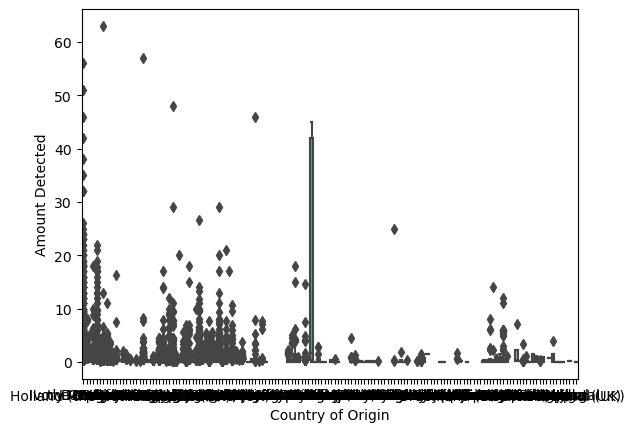

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='country_of_origin', y='amount_detected', data=df)
plt.xlabel('Country of Origin')
plt.ylabel('Amount Detected')
plt.show()

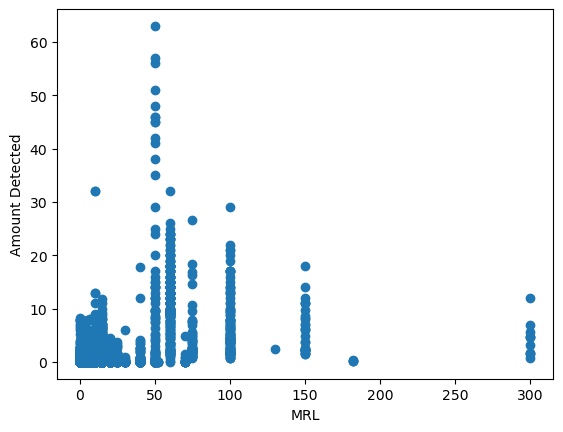

In [135]:
plt.scatter(df['MRL'], df['amount_detected'])
plt.xlabel('MRL')
plt.ylabel('Amount Detected')
plt.show()

In [166]:
r = {'country_of_origin': 'compliant'}
s = {'country_of_origin': 'non_compliant'}
country_count = df.loc[df['compliant'] == 'Y', 'country_of_origin'].value_counts().reset_index().rename(r, axis=1)
country_count_N = df.loc[df['compliant'] == 'N', 'country_of_origin'].value_counts().reset_index().rename(s, axis=1)

In [171]:
cdf = country_count.merge(country_count_N, how='outer', on='index')
cdf['proportion'] = cdf['non_compliant']/cdf['compliant']

In [175]:
cdf.sort_values(by=['proportion'], ascending=False)[0:20]

,index,compliant,non_compliant,proportion
130,Switzerland,2.0,1.0,0.500000
42,Malaysia,80.0,39.0,0.487500
105,Egypt,5.0,2.0,0.400000
52,Bangladesh,46.0,16.0,0.347826
85,Romania,10.0,3.0,0.300000
46,Jordan,62.0,18.0,0.290323
47,Thailand,55.0,14.0,0.254545
69,Pakistan,18.0,4.0,0.222222
6,India,777.0,161.0,0.207207
86,Gambia,10.0,2.0,0.200000


In [176]:
df

,sample_id,date_of_sampling,description,country_of_origin,sampling_point,address,brand_name,packer / manufacturer / importer,amount_detected,chem_name,MRL,month_year,compliant
0,3729/2021,2021-05-25T00:00:00,Green Asparagus,UK,Aberdeen & Stanton Ltd,"67 New Spitalfields Market, Sherrin Road, Leyt...",Watts Farms,"Watts Farm Farningham Hill Road, Farningham, K...",NaN,NaN,NaN,2021-05,Y
1,3697/2021,2021-05-25T00:00:00,Asparagus,UK,Addey & Son (Western International) Ltd,"P35 Western International Market, Hayes Road, ...",Spanton Farms,"Edward Spanton Farms Wayborough Farm, Minster,...",NaN,NaN,NaN,2021-05,Y
2,3715/2021,2021-05-11T00:00:00,Asparagus,UK,Aldi,"Thomsett Way, Queenborough, Kent ME11 5AR",Aldi,,NaN,NaN,NaN,2021-05,Y
3,5503/2021,2021-11-15T00:00:00,Asparagus Tips,Peru,Aldi,"Marton Road, Middlesbrough TS4 2PQ",Nature's Pick,"Aldi Stores Ltd PO Box 26. Atherstone, Warwick...",NaN,NaN,NaN,2021-11,Y
4,0565/2021,2021-10-18T00:00:00,Asparagus,Peru,Asda,"Western Way, Bury St Edmunds IP33 3SP",ASDA Grower Selection,"ASDA Stores Ltd Great Wilson Street, Leeds LS1...",NaN,NaN,NaN,2021-10,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,0142/2022 Organic,2022-02-07T00:00:00,Organic Barbareia Tomatoes,Spain,Lidl,"5a Armagh Road, Newry BT35 6PR",Oaklands,"Lidl Ireland Main Road, Tallaght, Dublin 24, I...",0.01,spinosad,0.7,2022-02,Y
32532,0005/2022,2022-01-24T00:00:00,Julita,Spain,Tesco,"Jubilee Way, Newtownabbey BT36 5XD",Tesco Finest,"Tesco Stores Ltd Tesco House, Shire Park, Kest...",0.08,azoxystrobin,3.0,2022-01,Y
32533,0005/2022,2022-01-24T00:00:00,Julita,Spain,Tesco,"Jubilee Way, Newtownabbey BT36 5XD",Tesco Finest,"Tesco Stores Ltd Tesco House, Shire Park, Kest...",0.40,boscalid,3.0,2022-01,Y
32534,0005/2022,2022-01-24T00:00:00,Julita,Spain,Tesco,"Jubilee Way, Newtownabbey BT36 5XD",Tesco Finest,"Tesco Stores Ltd Tesco House, Shire Park, Kest...",0.30,fenpyrazamine,3.0,2022-01,Y


In [178]:
px.scatter(df, x='MRL', y='amount_detected', alpha=0.1)

TypeError: scatter() got an unexpected keyword argument 'alpha'